# Import libraries and dependencies

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import utils
import matplotlib.pyplot as plt

/opt/anaconda3/envs/IAA/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load and preprocess data

In [3]:
# Set the path to the file you'd like to load
file_path = "sp500_data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "shannanl/sp500-dataset",
  file_path,
)
df.rename(columns={df.columns[0]: "day"}, inplace=True)
date_lookup = dict(enumerate(df["day"]))
df_apple = utils.load_comp_data(df, "AAPL")
window_size = 20
df_apple_fe = utils.compute_features(df_apple, w=window_size, cut=False)

/var/folders/4s/_4bl0c291990qqkpvgrj459r0000gn/T/ipykernel_13980/1443475647.py:5: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(
/Users/vinconig/Desktop/PUCP/IAA/Repos/Stonks/utils.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  result.fillna(method='ffill', inplace=True)


# Explore the data

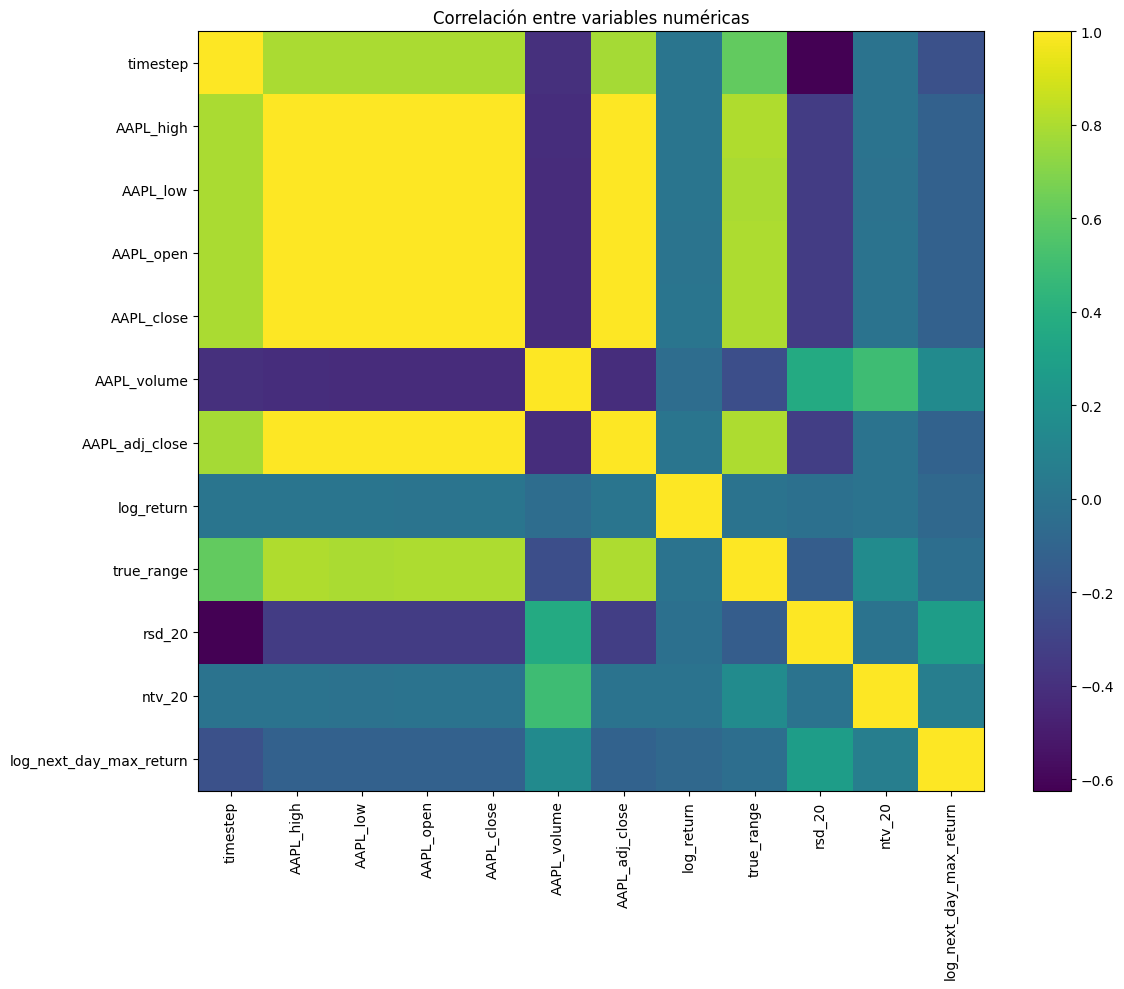

In [29]:
corr = df_apple_fe.corr()
plt.figure(figsize=(12, 10))
plt.imshow(corr, cmap='viridis', aspect='auto')
plt.title('Correlación entre variables numéricas')
plt.colorbar()

cols = corr.columns
plt.xticks(ticks=range(len(cols)), labels=cols, rotation=90, fontsize=10)
plt.yticks(ticks=range(len(cols)), labels=cols, fontsize=10)

plt.tight_layout()
plt.show()

Since features are heavily correlated, this is already a sign, that Baseline Models might not do so well

# Train Baseline Model

In [19]:
#Split the data into X (data) and y (target)
X = df_apple_fe.drop(columns=["timestep", "log_next_day_max_return"])
y = df_apple_fe["log_next_day_max_return"]
#Split the data into training and testing sets, but we can not do it randomized, we have to keep the temporal order
split_index = int(0.8 * len(df_apple_fe))
print(f"The dataset currently consists of {(len(df_apple_fe) / 365):.1f} years of daily data.")
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


The dataset currently consists of 15.0 years of daily data.


In [18]:
# Cargar libreriras y modulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]  #por defecto las figuras se displayan 10 pulgadas de ancho y 8 de alto

from sklearn.linear_model import LinearRegression   # para modelos de regresion lineal
from sklearn.linear_model import Ridge   # Ridge regression
from sklearn.linear_model import Lasso   # Lasso regression
from sklearn.linear_model import ElasticNet  # ElasticNet regression
from sklearn.neighbors import KNeighborsRegressor  # Knn regression
from sklearn.tree import DecisionTreeRegressor   # Decision Trees regression
from sklearn.svm import SVR  # Support Vector regression

from sklearn.model_selection import train_test_split  # para partir los datos en conjuntos de entrenamiento y validacion
from sklearn.model_selection import KFold  # para partir la data en k-folds
from sklearn.model_selection import cross_val_score   # para evaluar algoritmos en cross validacion

from sklearn.metrics import mean_squared_error, mean_absolute_error   # para manejar metricas de desempeño
from sklearn.metrics import explained_variance_score  # para hacer reportes de resultados de clasificacion
from sklearn.metrics import r2_score  # para manejar matrices de confusion


In [20]:
# Definimos el pool de algoritmos de ML a evaluar
algos = []
algos.append(('LinearReg', LinearRegression( )))
algos.append(('Ridge', Ridge( )))
algos.append(('Lasso', Lasso()))
algos.append(('ElasticNet', ElasticNet()))
algos.append(('KNN3', KNeighborsRegressor( n_neighbors=3 ) ))
algos.append(('KNN', KNeighborsRegressor( n_neighbors=5 ) ))
algos.append(('RegTrees', DecisionTreeRegressor( )))

Using the code of the lecture, we will analze all these baseline models with a 10-fold split

In [21]:
# Evaluamos cada algoritmo de ML en estrategia de 10-fold-CV
results = []
names = []

# genera el particionamiento de 10 folds que seran usados en cada evaluacion
seed = 7
kfold = KFold( n_splits=10, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

#  evalua cada algoritmo
for algoname, algo in algos:
    cv_results = cross_val_score(algo, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')  #r2 neg_mean_squared_error
    results.append(cv_results)
    names.append(algoname)
    print("{}: {} ({})".format(algoname, cv_results.mean(), cv_results.std()))

LinearReg: -0.0004518276420328167 (0.0002849417531291546)
Ridge: -0.0004586893774088417 (0.0002749279911631059)
Lasso: -0.0004875818837156695 (0.000269684525442945)
ElasticNet: -0.0004875818839289071 (0.0002696845262559489)
KNN3: -0.000626625278228938 (0.0002593351340045377)
KNN: -0.0005667505804453864 (0.0002915333107711384)


/opt/anaconda3/envs/IAA/lib/python3.13/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.04968e-21): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/opt/anaconda3/envs/IAA/lib/python3.13/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.85668e-21): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/opt/anaconda3/envs/IAA/lib/python3.13/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.90076e-21): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/opt/anaconda3/envs/IAA/lib/python3.13/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.87669e-21): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/opt/anaconda3/envs/IAA/lib/python3.13/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.86366e-21): result may not be accurate

RegTrees: -0.0009332502437049792 (0.00036892065843234495)


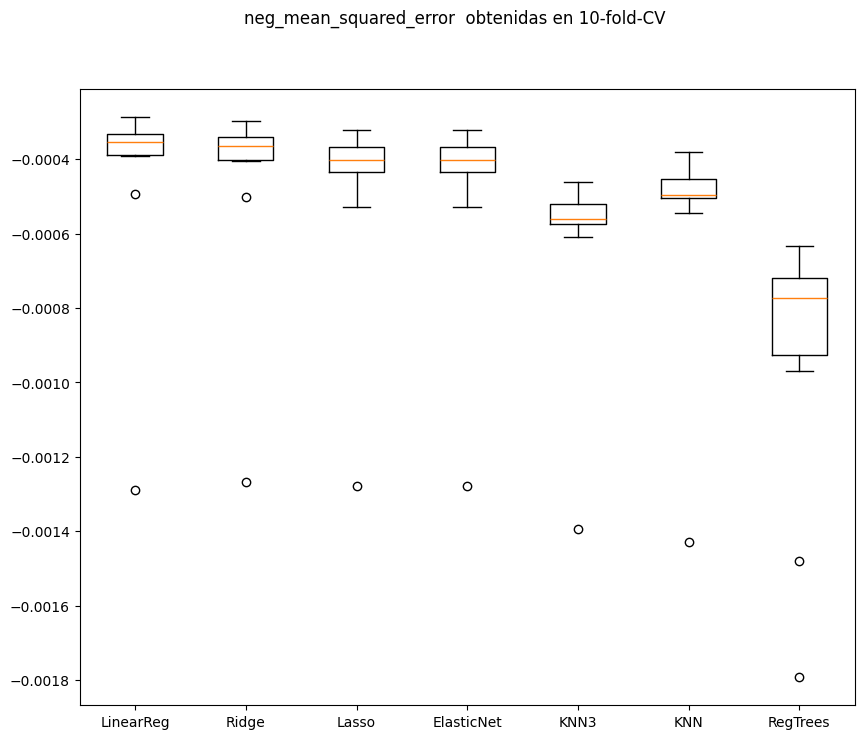

In [22]:
# Muestra graficamente los resultados de neg_mean_absolute_error  en crossvalidacion de los Algoritmos evaluados
fig = plt.figure()
fig.suptitle('neg_mean_squared_error  obtenidas en 10-fold-CV')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# Reentrena modelo de regresion con todos los datos de entrenamiento y lo prueba en el conjunto de test
model = LinearRegression() #  usar class_weight = 'balanced') para entrenar tomando en cuenta el desbalance
model.fit(X_train, y_train)

# predice el target en el conjunto de test
y_predicted = model.predict(X_test)
print("Mean squared error:", mean_squared_error(y_test, y_predicted))
print("Mean absolute error:", mean_absolute_error(y_test, y_predicted))
print("Explained variance score:", explained_variance_score(y_test, y_predicted))
print("R2 score:", r2_score(y_test, y_predicted))

Mean squared error: 0.0002676531315690043
Mean absolute error: 0.011141853713928413
Explained variance score: -0.13106424440586495
R2 score: -0.1413796030503247


Lets see how well the model generalizes. For that, we will create a chart that is basically the confusion matrix for regression. If the predictions were accurate, all points should lay on the diagonal.

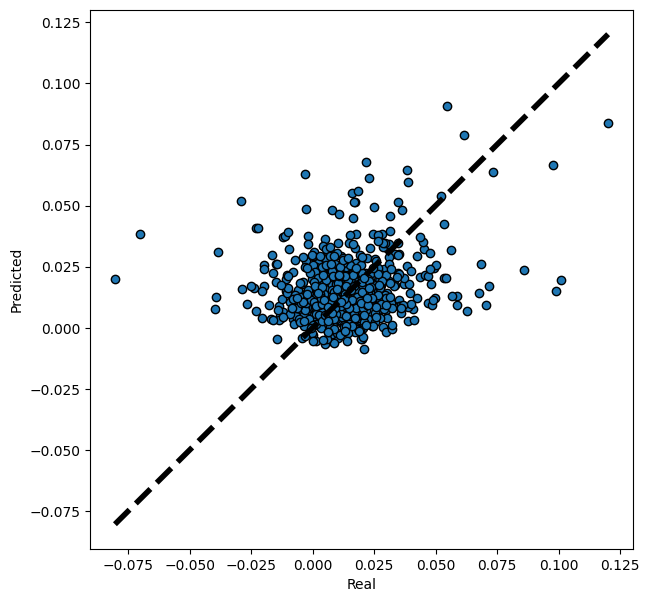

In [24]:
fig, ax = plt.subplots( figsize=[7,7])
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()